**Desafio Regressão Tera 2022**


**INTRODUÇÃO** 

**Objetivo**

Construir uma regressão linear simples, afim de gerar insights de valor para corretores, e proprietários, no que diz respeito à compra e venda de imóveis de alto padrão em dolar americano (U$), investigando os comportamentos dos índices do Dolar e do Ibovespa.

#Ferramentas a serem utilizadas
1. Instação de alguns pacotes para a análise de Finanças
2. Reinstalação de alguns pacotes por conta da versão no Google Colab.
3. Importação das bibliotecas do Python que serão utilizadas.
4. Importação das bibliotecas e funções que serão utilizadas para fazer a modelagem dos dados.
5. Importação das ferramentas que farão a regressão linear.

Fontes:

https://economia.awesomeapi.com.br/all/USD-BRL

http://www.portalaction.com.br/analise-de-regressao/12-estimacao-dos-parametros-do-modelo

https://economia.awesomeapi.com.br/all/USD-BRL

https://edisciplinas.usp.br/pluginfile.php/1479289/mod_resource/content/0/regr_lin.pdf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install yfinance
!pip install yahoofinancials
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader
!pip install yfinance --upgrade --no-cache-dir
yf.pdr_override()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Reinstalação de alguns pacotes por conta da versão utilizada no Google Colab
!pip install category_encoders
!pip install -U scikit-learn==0.24.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importando bibliotecas do Python que serão utilizadas no projeto
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Tuple
import yfinance as yf
import pandas_datareader.data as web
import requests
import json
import  urllib 
import  re
import os



In [ ]:
#Importando as bibliotecas e funções que serão utilizadas para fazer a modelagem dos dados
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from category_encoders.target_encoder import TargetEncoder
from sklearn.inspection import permutation_importance
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
import statsmodels.api as sm






In [ ]:
#Importação das ferramentas que farão a regressão linear
from sklearn.linear_model import LinearRegression
from category_encoders.target_encoder import TargetEncoder

**ANÁLISE EXPLORATÓRIA**


In [ ]:
dolar = yf.download('DX=F', start='2019-01-01', end='2022-06-14')

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Análise - dolar DX=F
dolar.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 871 entries, 2019-01-02 to 2022-06-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       871 non-null    float64
 1   High       871 non-null    float64
 2   Low        871 non-null    float64
 3   Close      871 non-null    float64
 4   Adj Close  871 non-null    float64
 5   Volume     871 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 47.6 KB


[*********************100%***********************]  2 of 2 completed


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff8d6c83e50>,
      dtype=object)

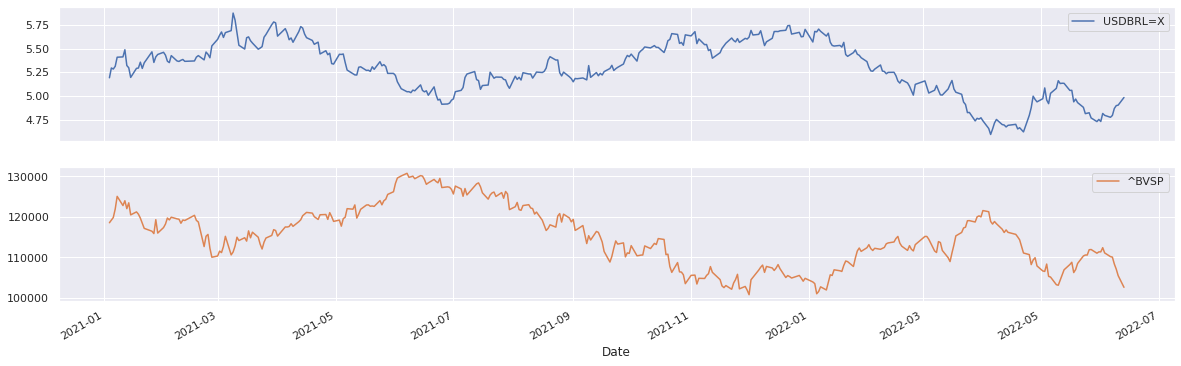

In [ ]:
#Investigando os respectivos comportamentos do Dólar e o Índice Ibovespa, do ano de 2021 até a data de hoje 2022-06-14


dolar_ibov = web.get_data_yahoo(['^BVSP', 'USDBRL=X'],
                                start = '2021-01-01',
                                end = '2022-06-14')['Close']
 
dolar_ibov = dolar_ibov.dropna()
 
sns.set()
 
dolar_ibov.plot(subplots = True, figsize = (20, 6))

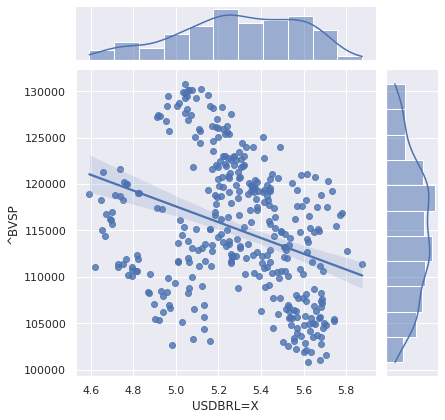

In [ ]:
	
sns.jointplot(x = 'USDBRL=X', y = '^BVSP', data = dolar_ibov, kind = 'reg')


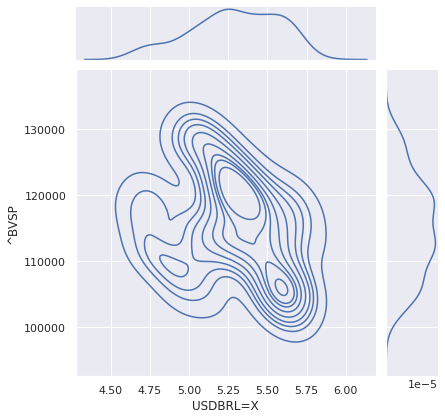

In [ ]:
sns.jointplot(x = 'USDBRL=X', y = '^BVSP', data = dolar_ibov, kind = 'kde')

In [ ]:
#Acessando uma API
requisicao = requests.get('https://economia.awesomeapi.com.br/all/USD-BRL')

In [ ]:
#Desserialização do retorno da API

cotacao = requisicao.json()

In [ ]:
#Cotação do dia 2022-06-14 Dolar americano(U$)

print(cotacao)

{'USD': {'code': 'USD', 'codein': 'BRL', 'name': 'Dólar Americano/Real Brasileiro', 'high': '5.1514', 'low': '5.0866', 'varBid': '0.0166', 'pctChange': '0.33', 'bid': '5.1312', 'ask': '5.1329', 'timestamp': '1655231784', 'create_date': '2022-06-14 15:36:24'}}


**Definindo variáveis**

In [ ]:
#Variável preditora: é a variável independente, que tem o poder de influenciar na variável que nós queremos encontrar. No exemplo do preço da casa, a variável preditora pode ser o seu tamanho, a quantidade de quartos ou alguma outra informação. 
#Quem vai nos dizer? Os dados que dispomos. Na equação acima, ela será o valor de a.

#Variável alvo ou dependente: é a variável que queremos prever. No nosso exemplo, será o preço da casa. Na equação acima, ela terá como valor o resultado da função para cada valor de y.

#Declarando como libs do Python
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
# fonte: # fonte: "http://www.portalaction.com.br/analise-de-regressao/12-estimacao-dos-parametros-do-modelo"
# criando variáveis que serão usadas daqui para frente
# variável preditora
X = np.array([ 220, 220, 220, 220, 220, 225, 225, 225, 225, 225, 230, 230, 230, 230, 230, 235, 235, 235, 235, 235 ])
# variável alvo
y = np.array([ 137, 137, 137, 136, 135, 135, 133, 132, 133, 133, 128, 124, 126, 129, 126, 122, 122, 122, 119, 122 ])

In [ ]:
#Visualizando estatísticas do modelo usando statsmodels

# Adicionando uma constante a matriz X
X_sm = sm.add_constant(X)
# OLS vem de Ordinary Least Squares e o método fit irá treinar o modelo
results = sm.OLS(y, X_sm).fit()
# mostrando as estatísticas do modelo
results.summary()
# mostrando as previsões para o mesmo conjunto passado
results.predict(X_sm)

array([137.14, 137.14, 137.14, 137.14, 137.14, 131.98, 131.98, 131.98,
       131.98, 131.98, 126.82, 126.82, 126.82, 126.82, 126.82, 121.66,
       121.66, 121.66, 121.66, 121.66])

In [ ]:
#Definindo o modelo com o scikit-learn

df = pd.DataFrame()
df['x'] = X
df['y'] = y
# passando os valores de x e y como Dataframes
x_v = df[['x']]
y_v = df[['y']]
# criando e treinando o modelo
model = LinearRegression()
model.fit(x_v, y_v)
# para visualizar os coeficientes encontrados
model.coef_

array([[-1.032]])

In [ ]:
#Escrevendo a primeira classe da Regressão Linear simples

class SimpleLinearRegression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        self.formula = None
        self.X = None
        self.y = None
    
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        
        self.X = X
        self.y = y
        soma_xy = sum(X * y)
        soma_x_ao_quadrado = sum(X * X)
        soma_x = sum(X)
        soma_y = sum(y)
        n = len(X)
        media_x = X.mean()
        media_y = y.mean()
        
        # build formula y = ax + b
        a = ( soma_xy - n * media_x * media_y ) / ( soma_x_ao_quadrado - n * ( media_x ** 2 ) )
        b = media_y - (a * media_x)
        
        self.coef_ = np.array([ b ])
        self.intercept_ = np.array([ a ])
        
        self.formula = lambda _x : (a * _x) + b
    
    def predict(self, x):
        return np.array(list(map(self.formula, x)))
    
    # fonte: https://edisciplinas.usp.br/pluginfile.php/1479289/mod_resource/content/0/regr_lin.pdf
    def sum_total_quadratic(self):
        median = self.y.mean()
        return sum( ( y - median ) ** 2 )
    
    def sum_error_quadratic(self):
        predicted = self.predict(x=self.X)
        return sum( ( self.y - predicted ) ** 2 )

    def regression_quadratic_sum(self):
        return self.sum_total_quadratic() - self.sum_error_quadratic()
    
    def score(self):
        return self.regression_quadratic_sum() / self.sum_total_quadratic()